In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load Banglore dataset

In [2]:
pune = pd.read_csv("pune_house_prices.csv")
pune.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [3]:
pune.shape

(13320, 9)

### Choosing Required Columns only

In [4]:
pune = pune[['total_sqft','size','site_location','bath','price']]

In [5]:
pune.head()

,total_sqft,size,site_location,bath,price
0,1056,2 BHK,Alandi Road,2.0,39.07
1,2600,4 Bedroom,Ambegaon Budruk,5.0,120.00
2,1440,3 BHK,Anandnagar,2.0,62.00
3,1521,3 BHK,Aundh,3.0,95.00
4,1200,2 BHK,Aundh Road,2.0,51.00


In [6]:
pune= pune.rename(columns = {'total_sqft':'Area', 'size':'no_bhk','site_location':'locality'})

In [7]:
pune.head()

,Area,no_bhk,locality,bath,price
0,1056,2 BHK,Alandi Road,2.0,39.07
1,2600,4 Bedroom,Ambegaon Budruk,5.0,120.00
2,1440,3 BHK,Anandnagar,2.0,62.00
3,1521,3 BHK,Aundh,3.0,95.00
4,1200,2 BHK,Aundh Road,2.0,51.00


### Data Cleaning 

In [8]:
pune.isnull().sum()

Area         0
no_bhk      16
locality     1
bath        73
price        0
dtype: int64

In [9]:
pune = pune.dropna()
pune.isnull().sum()

Area        0
no_bhk      0
locality    0
bath        0
price       0
dtype: int64

In [10]:
pune.shape

(13246, 5)

### Feature Engineering

In [11]:
pune['bhk'] = pune['no_bhk'].apply(lambda x: int(x.split(' ')[0]))
pune['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

### Exploring Area in square feet 

In [12]:


def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [13]:
pune[~pune['Area'].apply(is_float)].head()

,Area,no_bhk,locality,bath,price,bhk
30,2100 - 2850,4 BHK,Gultekdi,4.0,186.000,4
122,3067 - 8156,4 BHK,Ganeshkhind,4.0,477.000,4
137,1042 - 1105,2 BHK,Khadaki,2.0,54.005,2
165,1145 - 1340,2 BHK,Prabhat Road,2.0,43.490,2
188,1015 - 1540,2 BHK,Wakadewadi,2.0,56.800,2


In [14]:
def convert_range_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [15]:
pune1 = pune.copy()
pune1.Area = pune1.Area.apply(convert_range_to_num)
pune1 = pune1[pune1.Area.notnull()]
pune1.head()

,Area,no_bhk,locality,bath,price,bhk
0,1056.0,2 BHK,Alandi Road,2.0,39.07,2
1,2600.0,4 Bedroom,Ambegaon Budruk,5.0,120.00,4
2,1440.0,3 BHK,Anandnagar,2.0,62.00,3
3,1521.0,3 BHK,Aundh,3.0,95.00,3
4,1200.0,2 BHK,Aundh Road,2.0,51.00,2


In [16]:
# Removing n0_bhk column

pune1 = pune1.drop(['no_bhk'],axis='columns')

In [17]:
pune1.head()

,Area,locality,bath,price,bhk
0,1056.0,Alandi Road,2.0,39.07,2
1,2600.0,Ambegaon Budruk,5.0,120.00,4
2,1440.0,Anandnagar,2.0,62.00,3
3,1521.0,Aundh,3.0,95.00,3
4,1200.0,Aundh Road,2.0,51.00,2


In [18]:
pune1 = pune1.rename(columns = {'Area':'area_in_sqft'})

In [19]:
pune1.columns

Index(['area_in_sqft', 'locality', 'bath', 'price', 'bhk'], dtype='object')

### Adding new feature called price per square feet

In [20]:
pune2 = pune1.copy()

In [21]:
pune2['price_per_sqft'] = pune2['price']*100000 / pune2['area_in_sqft']
pune2.head()

,area_in_sqft,locality,bath,price,bhk,price_per_sqft
0,1056.0,Alandi Road,2.0,39.07,2,3699.810606
1,2600.0,Ambegaon Budruk,5.0,120.00,4,4615.384615
2,1440.0,Anandnagar,2.0,62.00,3,4305.555556
3,1521.0,Aundh,3.0,95.00,3,6245.890861
4,1200.0,Aundh Road,2.0,51.00,2,4250.000000


In [22]:
# lets see the details of this feature

pune2.describe()

,area_in_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.354298,2.691212,112.280041,2.800909,7.920878e+03
std,1237.311149,1.338904,149.174654,1.292826,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.268165e+03
50%,1275.000000,2.000000,71.920000,3.000000,5.438331e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317073e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


#### Applying dimentionality reduction to get reduced number of localities 

In [23]:
pune2.locality = pune2.locality.apply(lambda x: x.strip())

locality_stats = pune2['locality'].value_counts(ascending = False)
locality_stats

Kasba Peth         139
Bibvewadi          139
Laxmi Road         139
Ambegaon Budruk    139
Nana Peth          139
                  ... 
Fatima Nagar       135
Model colony       135
Wakadewadi         134
Vadgaon Budruk     133
other                1
Name: locality, Length: 97, dtype: int64

In [24]:
pune2['locality'].unique()

array(['Alandi Road', 'Ambegaon Budruk', 'Anandnagar', 'Aundh',
       'Aundh Road', 'Balaji Nagar', 'Baner', 'Baner road',
       'Bhandarkar Road', 'Bhavani Peth', 'Bibvewadi', 'Bopodi',
       'Budhwar Peth', 'Bund Garden Road', 'Camp', 'Chandan Nagar',
       'Dapodi', 'Deccan Gymkhana', 'Dehu Road', 'Dhankawadi',
       'Dhayari Phata', 'Dhole Patil Road', 'Erandwane', 'Fatima Nagar',
       'Fergusson College Road', 'Ganesh Peth', 'Ganeshkhind',
       'Ghorpade Peth', 'other', 'Gokhale Nagar', 'Gultekdi',
       'Guruwar peth', 'Hadapsar', 'Hadapsar Industrial Estate',
       'Hingne Khurd', 'Jangali Maharaj Road', 'Kalyani Nagar',
       'Karve Nagar', 'Karve Road', 'Kasba Peth', 'Katraj', 'Khadaki',
       'Khadki', 'Kharadi', 'Kondhwa', 'Kondhwa Budruk', 'Kondhwa Khurd',
       'Koregaon Park', 'Kothrud', 'Law College Road', 'Laxmi Road',
       'Lulla Nagar', 'Mahatma Gandhi Road', 'Mangalwar peth',
       'Manik Bagh', 'Market yard', 'Mukund Nagar', 'Mundhawa',
       'Naga

In [25]:
locality_stats.values.sum()

13200

In [26]:
len(locality_stats[locality_stats<5])

1

In [27]:
len(pune2.locality.unique())

97

## Lets remove outliers by using business logic

###### As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell 
###### you that normally square ft per bedroom is 300. For instance, if you had a 400 square foot, 2-bedroom flat, that seems odd 
###### and can be eliminated as an anomaly. We will eliminate such anomalies by maintaining a 300 square foot minimum sales size per 
###### bedroom.

In [28]:
pune2[pune2.area_in_sqft/pune2.bhk<300].head()

,area_in_sqft,locality,bath,price,bhk,price_per_sqft
9,1020.0,Bhavani Peth,6.0,370.0,6,36274.509804
45,600.0,Kondhwa Budruk,9.0,200.0,8,33333.333333
58,1407.0,Mundhawa,4.0,150.0,6,10660.980810
68,1350.0,Pirangut,7.0,85.0,8,6296.296296
70,500.0,Pune Railway Station,3.0,100.0,3,20000.000000


###### We have a 6 bedroom, 1020 square foot flat. Another one has eight bedrooms and 600 total square feet. These are obvious data 
###### inaccuracies that can be safely eliminated.

In [29]:
pune3 = pune2[~(pune2.area_in_sqft/pune2.bhk<300)]
pune3.shape

(12456, 6)

###### We will find the Minimum price per sqft and maximum price per sqft so that we detect some outliers and we will remove it.

In [30]:
pune3.price_per_sqft.describe()

count     12456.000000
mean       6308.628922
std        4168.075333
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

###### Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. 
###### We should remove outliers per location using mean and one standard deviation

In [31]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('locality'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
pune4 = remove_outliers(pune3)
pune4.shape

(10883, 6)

###### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

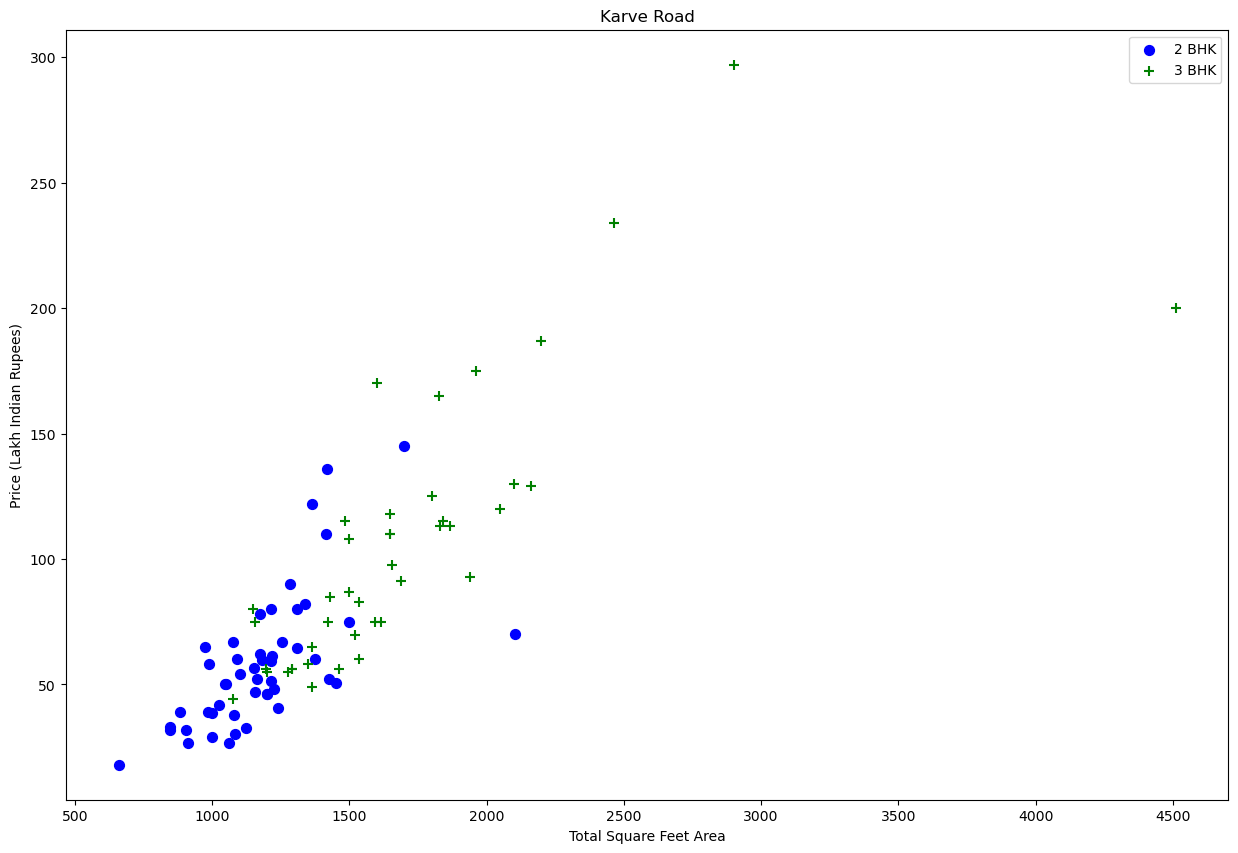

In [32]:
def plot_scatter_chart(df,locality):
    bhk2 = df[(df.locality==locality) & (df.bhk==2)]
    bhk3 = df[(df.locality==locality) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.area_in_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.area_in_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(locality)
    plt.legend()
    
plot_scatter_chart(pune4,"Karve Road")

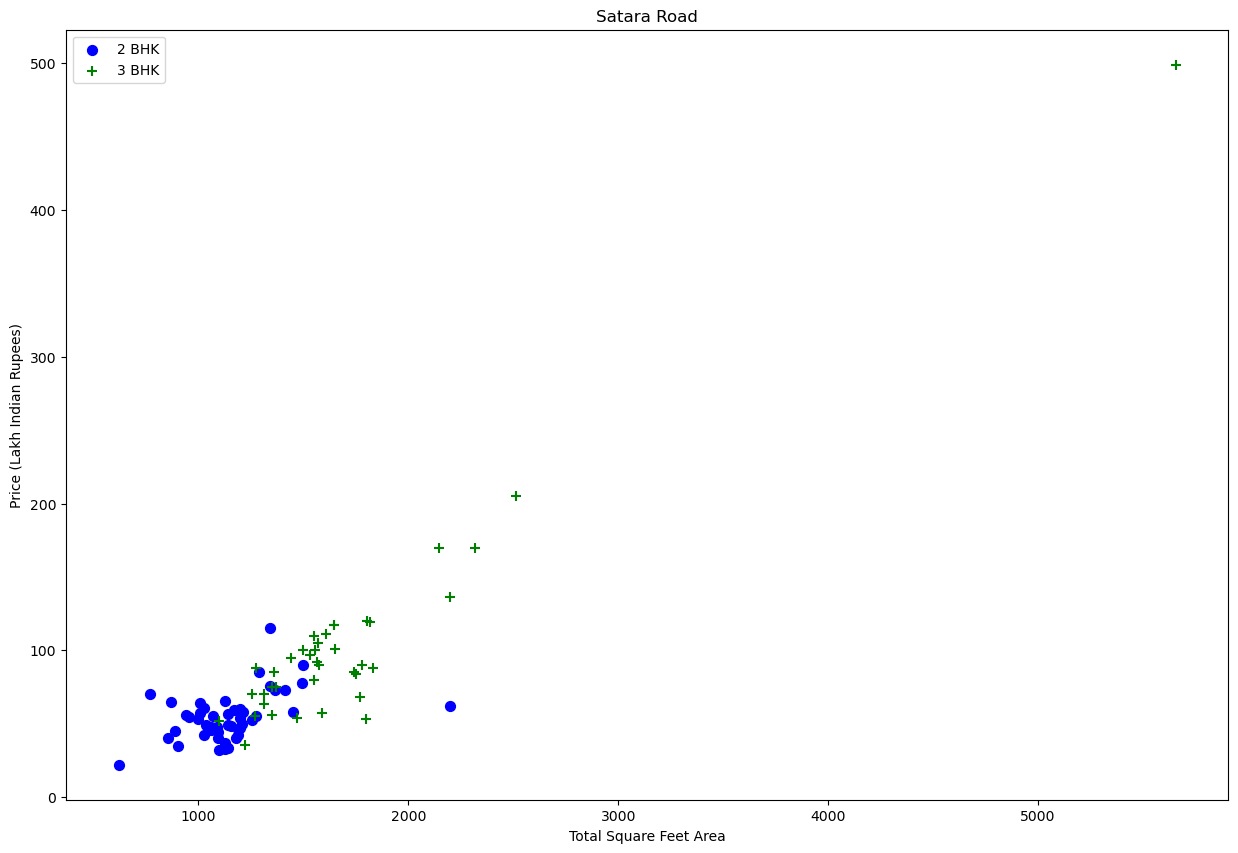

In [33]:
plot_scatter_chart(pune4,"Satara Road")

###### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [34]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for locality, locality_df in df.groupby('locality'):
        bhk_stats = {}
        for bhk, bhk_df in locality_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in locality_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
pune5 = remove_bhk_outliers(pune4)
pune5.shape

(7543, 6)

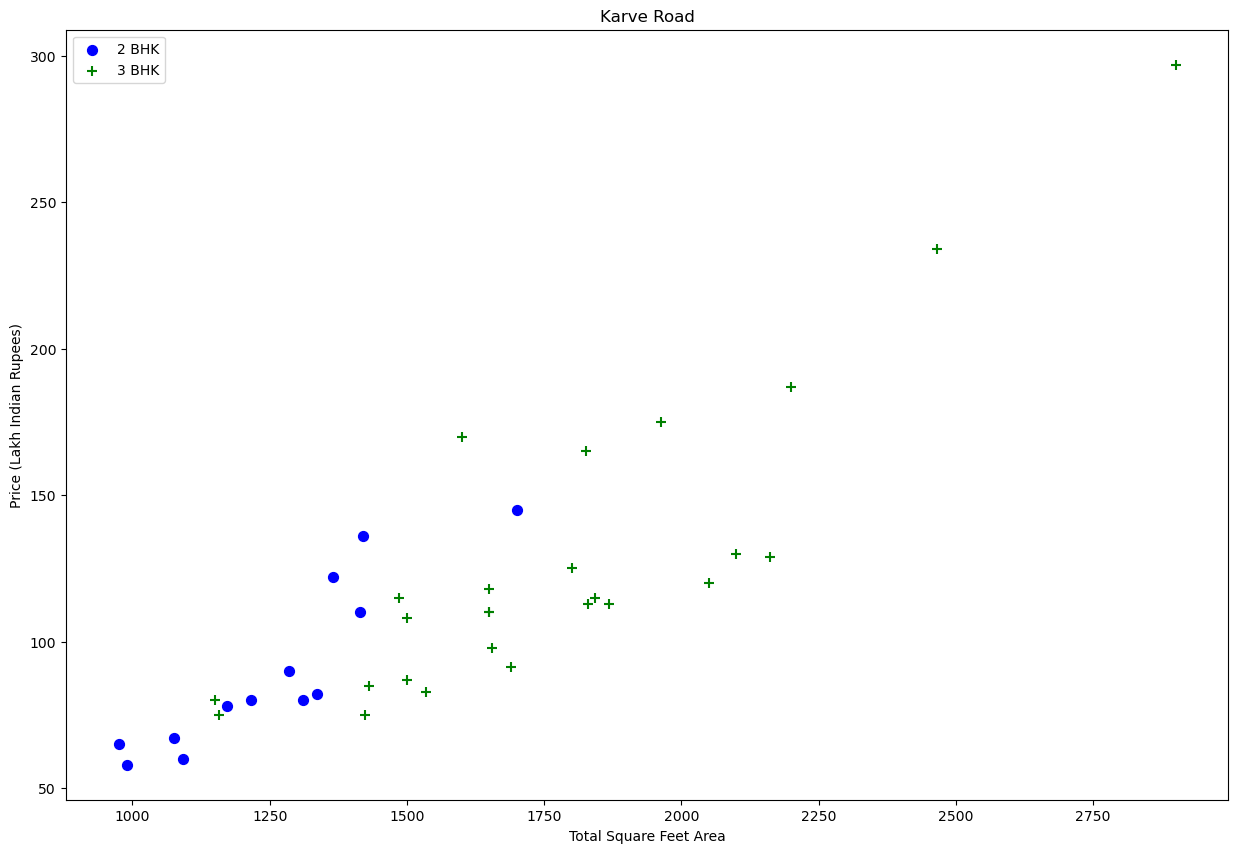

In [35]:
plot_scatter_chart(pune5,"Karve Road")

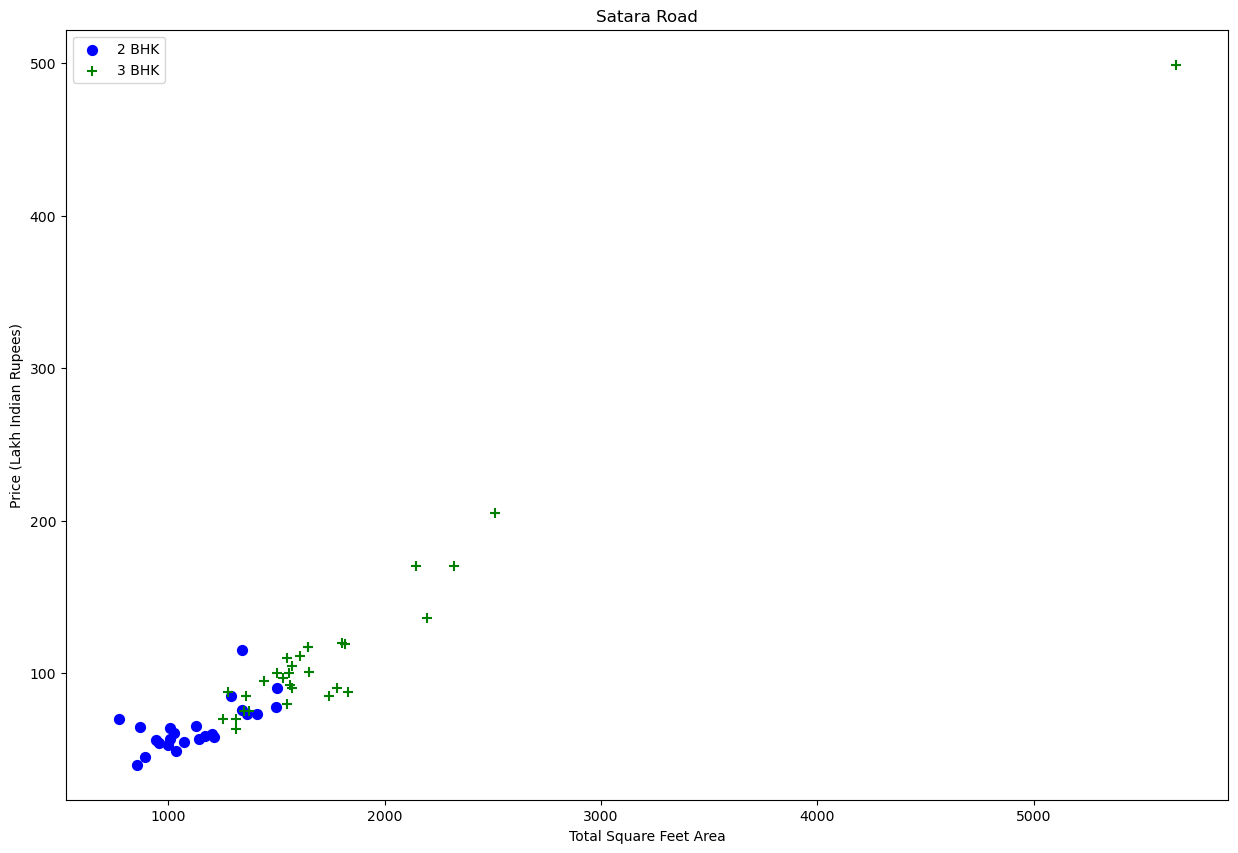

In [36]:
plot_scatter_chart(pune5,"Satara Road")

Text(0, 0.5, 'Count')

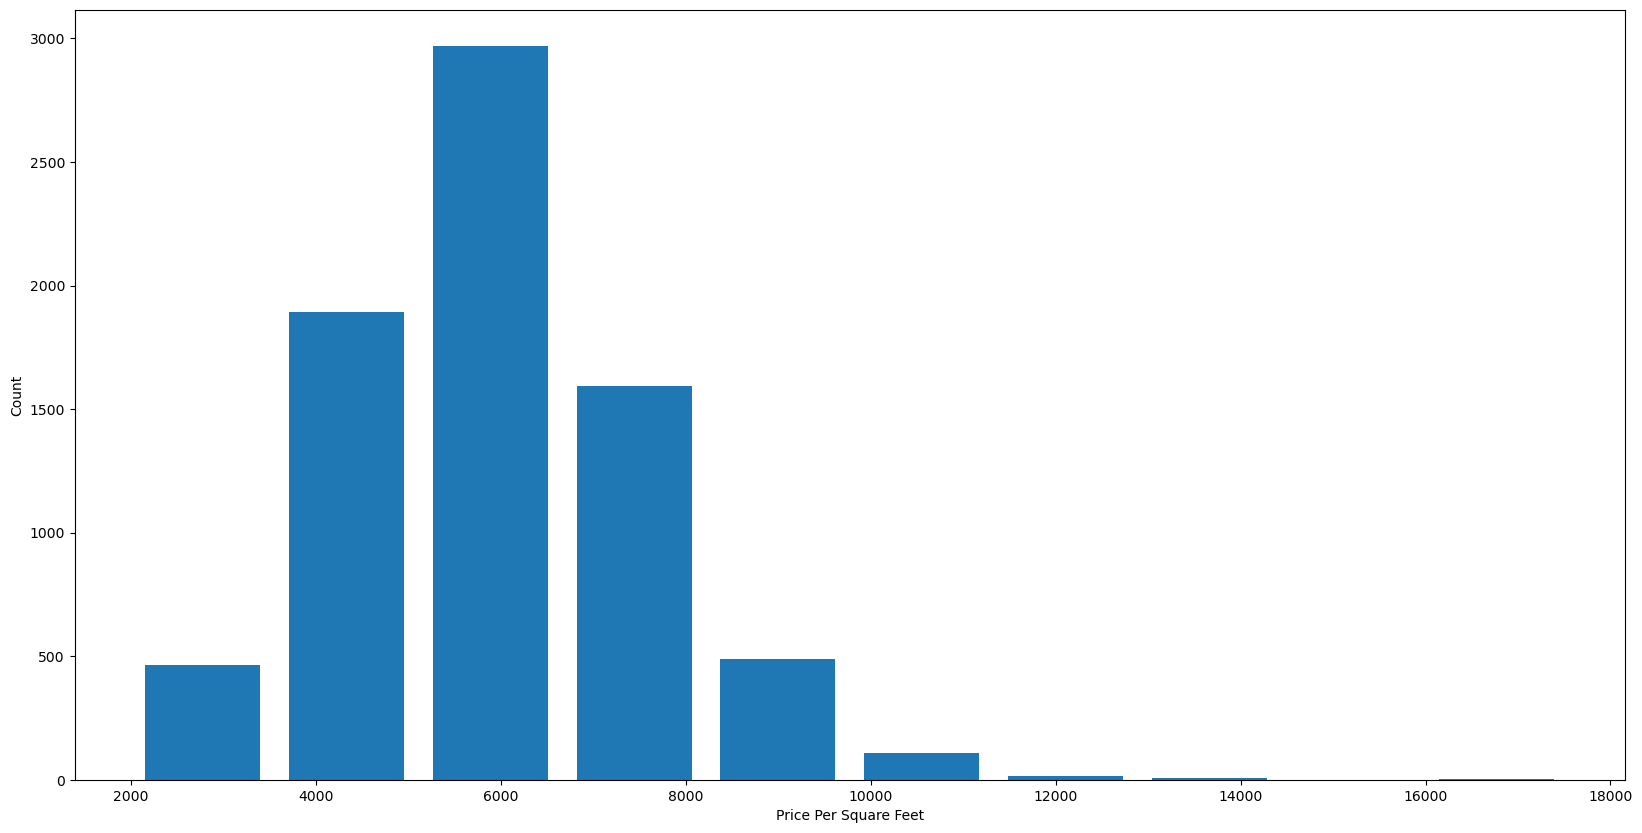

In [37]:
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(pune5.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

#### Outlier Removal Using Bathrooms Feature

In [38]:
pune5.bath.unique()

array([ 2.,  4.,  3.,  5.,  9.,  1.,  6.,  7.,  8., 12., 13., 16.])

In [39]:
pune5[pune5.bath>10]

,area_in_sqft,locality,bath,price,bhk,price_per_sqft
1211,6000.0,Bibvewadi,12.0,150.0,11,2500.000000
2637,12000.0,Fatima Nagar,12.0,525.0,10,4375.000000
5265,5425.0,Kondhwa Khurd,13.0,275.0,13,5069.124424
6350,10000.0,Model colony,16.0,550.0,16,5500.000000
10389,4000.0,Wagholi,12.0,160.0,10,4000.000000


##### It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [40]:
pune5[pune5.bath>pune5.bhk+2]

,area_in_sqft,locality,bath,price,bhk,price_per_sqft
772,1806.0,Baner,6.0,116.0,3,6423.034330
3067,11338.0,Ghorpade Peth,9.0,1000.0,6,8819.897689
4231,7000.0,Karve Nagar,8.0,450.0,4,6428.571429


In [41]:
pune6 = pune5[pune5.bath<pune5.bhk+2]
pune6.shape

(7479, 6)

In [42]:
pune7 = pune6.drop(['price_per_sqft'],axis='columns')
pune7.head(3)

,area_in_sqft,locality,bath,price,bhk
0,1056.0,Alandi Road,2.0,39.07,2
1,2894.0,Alandi Road,4.0,245.00,4
2,1084.0,Alandi Road,2.0,50.00,2


## Using One Hot Encoding For Locality

In [43]:
dummies = pd.get_dummies(pune7.locality)
dummies.head(3)

,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
pune8 = pd.concat([pune7,dummies],axis='columns')
pune8.head()

,area_in_sqft,locality,bath,price,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,Alandi Road,2.0,39.07,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,Alandi Road,4.0,245.00,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,Alandi Road,2.0,50.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,Alandi Road,2.0,80.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,Alandi Road,3.0,130.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
pune9 = pune8.drop('locality',axis='columns')
pune9.head(2)

,area_in_sqft,bath,price,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,39.07,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,245.00,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data cleaning and feature engineering is done 
# Build the Model

In [47]:
X = pune9.drop(['price'],axis='columns')
X.head()

,area_in_sqft,bath,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
X.shape

(7479, 99)

In [49]:
y = pune9.price
y.head()

0     39.07
1    245.00
2     50.00
3     80.00
4    130.00
Name: price, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8225341180112885

## Applying K Fold cross validation to measure accuracy of LinearRegression model

In [52]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.87729294, 0.87158074, 0.82818963, 0.89763339, 0.81087541])

### Lets try out some other algorithms so that we compare the results and check which one is giving the best result

## Using GridsSarchCV for hyper-parameter tuning

In [53]:

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.857114,{'normalize': False}
1,lasso,0.857860,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.764008,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


## Based on above results we can say that LinearRegression gives the best score. Hence we will use that

## Test the model for few properties

In [54]:
def predict_price(locality,area_in_sqft,bath,bhk):    
    loc_index = np.where(X.columns==locality)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = area_in_sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

In [56]:
predict_price('Fatima Nagar',1000, 2, 2)

51.338035583496094

In [57]:
predict_price('Fatima Nagar',5000, 3, 3)

338.0773506164551

# Export the tested model to a pickle file

In [58]:
import pickle
with open('pune_home_prices_model.pickle','wb') as f:
    pickle.dump(lr,f)

## Export location and column information to a file that will be useful later on in our prediction application

In [59]:

import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("pune_locality.json","w") as f:
    f.write(json.dumps(columns))